In [31]:
import os
import csv

m0="results/random_cartpole_ActionsPerEpisode.txt"
m1="results/seedrun_m1-2022-01-16/run_seed1394398/evaluation_0"
m2="results/seedrun_m1-2022-01-16/run_seed1394398/continue_1/continue_1/continue_2/continue_2/continue_2/evaluation_1"
m3="results/seedrun_m1-2022-01-16/run_seed5397326/evaluation_0"
m4="results/seedrun_m1-2022-01-16/run_seed5397326/continue_1/continue_1/continue_2/continue_2/continue_2/evaluation_50"

perfs = {}
for mfile,mname in zip([m0, m1, m2, m3, m4], ['rand', 's6b', 's6a', 's3b', 's3a']):
    perfs[mname] = []
    fullpath = os.path.join('../', mfile, 'ActionsPerEpisode.txt')
    if mfile.endswith('_ActionsPerEpisode.txt'):
        fullpath = os.path.join('../', mfile)
    with open(fullpath) as f:
        for row in csv.reader(f, delimiter='\t'):
#             print(float(row[1]))
            perfs[mname].append(float(row[1]))

In [32]:
list(perfs.keys())

['rand', 's6b', 's6a', 's3b', 's3a']

In [33]:
from scipy import stats
import numpy as np

list(perfs.values())

comparisons = ['rand', 's6b', 's3b']
# s6 before and after
F, p = stats.f_oneway(*[perfs[c] for c in comparisons])
print('p-value: ', p)
stds = [np.std(perfs[c]) for c in comparisons]
print('maxvar/minvar= ', max(stds) / min(stds))

p-value:  0.10058199487772984
maxvar/minvar=  1.4909730423815382


In [34]:
comparisons = ['s6b', 's6a']
# s6 before and after
F, p = stats.f_oneway(*[perfs[c] for c in comparisons])
print('p-value: ', p)
stds = [np.std(perfs[c]) for c in comparisons]
print('maxvar/minvar= ', max(stds) / min(stds))

p-value:  7.132563987191665e-33
maxvar/minvar=  6.848726626604206


In [64]:
comparisons = ['s3b', 's3a']
# s6 before and after
F, p = stats.f_oneway(*[perfs[c] for c in comparisons])
print('p-value: ', p)
stds = [np.std(perfs[c]) for c in comparisons]
print('maxvar/minvar= ', max(stds) / min(stds))

p-value:  1.033312269957866e-18
maxvar/minvar=  2.9763152442513845


In [60]:
log_perfs = {key: [np.log2(v) for v in vals] for key,vals in perfs.items()}

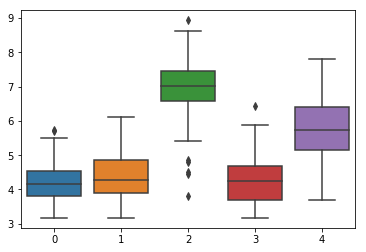

In [58]:
import seaborn as sns

kkeys = list(log_perfs.keys())
sns.boxplot(data=[log_perfs[k] for k in kkeys])

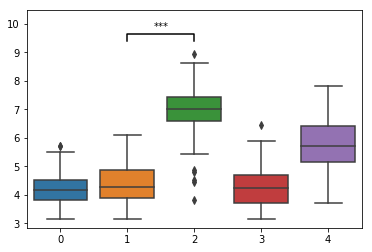

In [92]:
import matplotlib.pyplot as plt

kkeys = list(log_perfs.keys())
ax = sns.boxplot(data=[log_perfs[k] for k in kkeys])

x1, x2 = 1, 2
maxval = max(max(log_perfs[kkeys[x1]]), max(log_perfs[kkeys[x2]]))
y, h, col = maxval * 1.05, maxval*0.03, 'k'
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h*1.3, '***', ha='center', va='bottom', color=col)
ylim = ax.get_ylim()
ax.set_ylim([ylim[0], ylim[1] * 1.05])

plt.show()

10.973216290032482

In [73]:
maxval

6.108524456778169

In [63]:
comparisons = ['s6b', 's6a']
# s6 before and after
F, p = stats.f_oneway(*[log_perfs[c] for c in comparisons])
print('p-value: ', p)
stds = [np.std(log_perfs[c]) for c in comparisons]
print('maxvar/minvar= ', max(stds) / min(stds))

p-value:  1.8673991362619493e-56
maxvar/minvar=  1.3436535361541737


In [65]:
comparisons = ['s3b', 's3a']
# s6 before and after
F, p = stats.f_oneway(*[log_perfs[c] for c in comparisons])
print('p-value: ', p)
stds = [np.std(log_perfs[c]) for c in comparisons]
print('maxvar/minvar= ', max(stds) / min(stds))

p-value:  8.57290642449473e-26
maxvar/minvar=  1.265061823890177
